In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
trxn=pd.read_csv('Retail_Data_Transactions.csv')
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [3]:
response=pd.read_csv('Retail_Data_Response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [4]:
df=trxn.merge(response,on='customer_id',how='left')
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [5]:
df=df.dropna()
df

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1.0
1,CS4768,15-Mar-15,39,1.0
2,CS2122,26-Feb-13,52,0.0
3,CS1217,16-Nov-11,99,0.0
4,CS1850,20-Nov-13,78,0.0
...,...,...,...,...
124995,CS8433,26-Jun-11,64,0.0
124996,CS7232,19-Aug-14,38,0.0
124997,CS8731,28-Nov-14,42,0.0
124998,CS8133,14-Dec-13,13,0.0


In [6]:
df['response']=df['response'].astype('int64')
df['trans_date']=pd.to_datetime(df['trans_date'])
df

C:\Users\jvenk\AppData\Local\Temp\ipykernel_1436\313265443.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['response']=df['response'].astype('int64')
C:\Users\jvenk\AppData\Local\Temp\ipykernel_1436\313265443.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['trans_date']=pd.to_datetime(df['trans_date'])
C:\Users\jvenk\AppData\Local\Temp\ipykernel_1436\313265443.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

,customer_id,trans_date,tran_amount,response
0,CS5295,2013-02-11,35,1
1,CS4768,2015-03-15,39,1
2,CS2122,2013-02-26,52,0
3,CS1217,2011-11-16,99,0
4,CS1850,2013-11-20,78,0
...,...,...,...,...
124995,CS8433,2011-06-26,64,0
124996,CS7232,2014-08-19,38,0
124997,CS8731,2014-11-28,42,0
124998,CS8133,2013-12-14,13,0


In [7]:
df.dtypes

customer_id            object
trans_date     datetime64[ns]
tran_amount             int64
response                int64
dtype: object

In [8]:
from scipy import stats
import numpy as np

In [9]:
%pip install scipy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
z_scores=np.abs(stats.zscore(df['response']))
z_scores=3
outliers=z_scores>z_scores
print([outliers])

[False]


In [11]:
z_scores=np.abs(stats.zscore(df['tran_amount']))
z_scores=3
outliers=z_scores>z_scores
print([outliers])

[False]


<Axes: xlabel='response'>

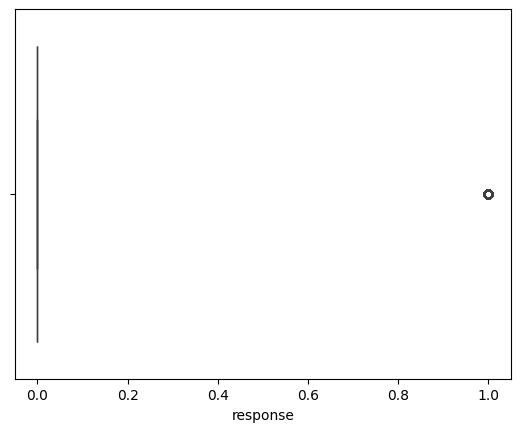

In [12]:
sns.boxplot(x=df['response'])


<Axes: xlabel='tran_amount'>

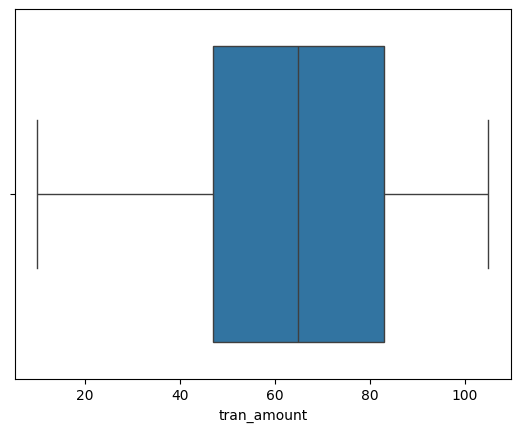

In [13]:
sns.boxplot(x=df['tran_amount'])

In [14]:
df['month']=df['trans_date'].dt.month
df

C:\Users\jvenk\AppData\Local\Temp\ipykernel_1436\749626650.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month']=df['trans_date'].dt.month


,customer_id,trans_date,tran_amount,response,month
0,CS5295,2013-02-11,35,1,2
1,CS4768,2015-03-15,39,1,3
2,CS2122,2013-02-26,52,0,2
3,CS1217,2011-11-16,99,0,11
4,CS1850,2013-11-20,78,0,11
...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6
124996,CS7232,2014-08-19,38,0,8
124997,CS8731,2014-11-28,42,0,11
124998,CS8133,2013-12-14,13,0,12


In [15]:
monthly_sales=df.groupby('month')['tran_amount'].sum()
monthly_sales=monthly_sales.sort_values(ascending=False).reset_index()
monthly_sales

,month,tran_amount
0,8,726775
1,10,725058
2,1,724089
3,7,717011
4,12,709795
5,11,698024
6,6,697014
7,9,694201
8,2,645028
9,3,636475


In [16]:
customer_counts=df['customer_id'].value_counts().reset_index().head(5)
customer_counts.columns=['customer_id','count']
customer_counts

,customer_id,count
0,CS4424,39
1,CS4320,38
2,CS3799,36
3,CS3013,35
4,CS1215,35


<Axes: xlabel='customer_id', ylabel='count'>

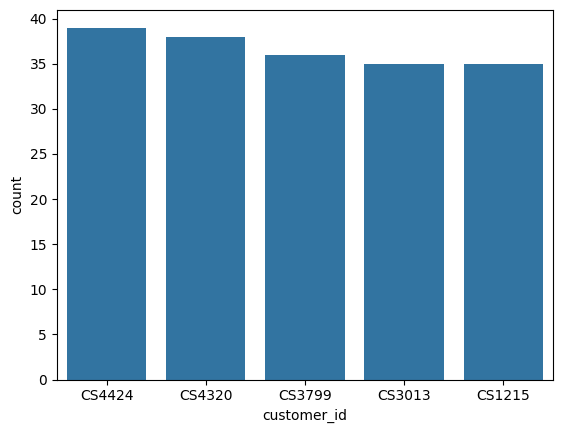

In [17]:
sns.barplot(x='customer_id',y='count',data=customer_counts)

In [18]:
customer_sales=df.groupby('customer_id')['tran_amount'].sum().reset_index()
customer_sales



,customer_id,tran_amount
0,CS1112,1012
1,CS1113,1490
2,CS1114,1432
3,CS1115,1659
4,CS1116,857
...,...,...
6879,CS8996,582
6880,CS8997,543
6881,CS8998,624
6882,CS8999,383


In [19]:
top_5_customers=customer_sales.sort_values(by='tran_amount',ascending=False).reset_index().head(5)
top_5_customers

,index,customer_id,tran_amount
0,3312,CS4424,2933
1,3208,CS4320,2647
2,4640,CS5752,2612
3,3548,CS4660,2527
4,2687,CS3799,2513


In [20]:
top_5_customers=customer_sales.sort_values(by='tran_amount',ascending=False).head(5)
top_5_customers.columns=['customer_id','tran_amount']
top_5_customers

,customer_id,tran_amount
3312,CS4424,2933
3208,CS4320,2647
4640,CS5752,2612
3548,CS4660,2527
2687,CS3799,2513


<Axes: xlabel='customer_id', ylabel='tran_amount'>

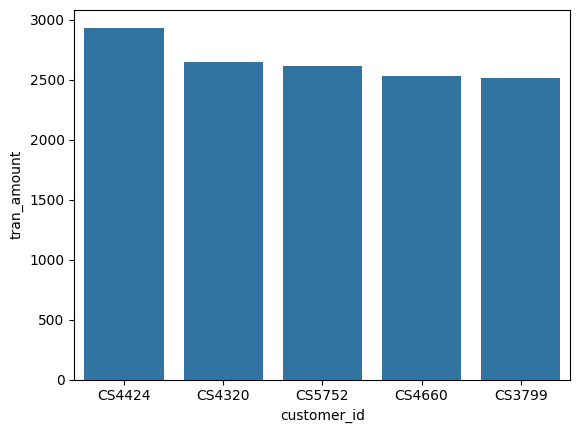

In [21]:
sns.barplot(x='customer_id',y='tran_amount',data=top_5_customers)

In [22]:
import matplotlib.dates as mdates

In [23]:
df['month_year']=df['trans_date'].dt.to_period('M')

C:\Users\jvenk\AppData\Local\Temp\ipykernel_1436\3583483542.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year']=df['trans_date'].dt.to_period('M')


In [24]:
df

,customer_id,trans_date,tran_amount,response,month,month_year
0,CS5295,2013-02-11,35,1,2,2013-02
1,CS4768,2015-03-15,39,1,3,2015-03
2,CS2122,2013-02-26,52,0,2,2013-02
3,CS1217,2011-11-16,99,0,11,2011-11
4,CS1850,2013-11-20,78,0,11,2013-11
...,...,...,...,...,...,...
124995,CS8433,2011-06-26,64,0,6,2011-06
124996,CS7232,2014-08-19,38,0,8,2014-08
124997,CS8731,2014-11-28,42,0,11,2014-11
124998,CS8133,2013-12-14,13,0,12,2013-12


C:\Users\jvenk\AppData\Local\Temp\ipykernel_1436\480811694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month_year']=df['trans_date'].dt.to_period('M')


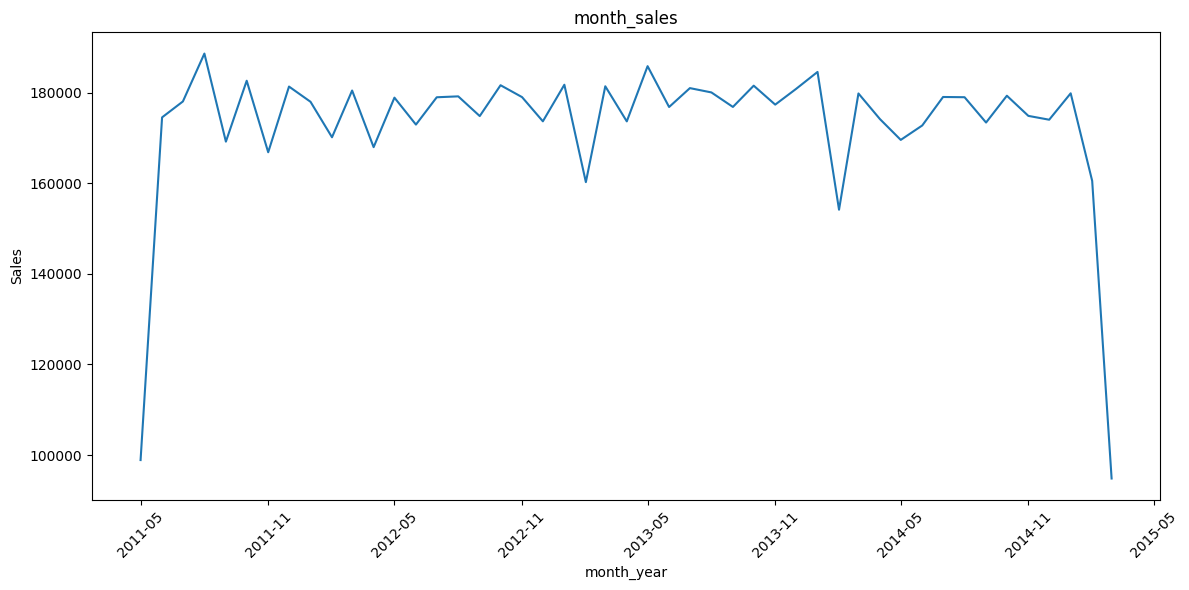

In [25]:
df['month_year']=df['trans_date'].dt.to_period('M')
df
monthly_sales=df.groupby('month_year')['tran_amount'].sum()
monthly_sales.index= monthly_sales.index.to_timestamp()
plt.figure(figsize=(12,6))
plt.plot(monthly_sales.index, monthly_sales.values)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))
plt.xlabel('month_year')
plt.ylabel('Sales')
plt.title('month_sales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [26]:
recency=df.groupby('customer_id')['trans_date'].max()
frequency=df.groupby('customer_id')['trans_date'].count()
monetory=df.groupby('customer_id')['tran_amount'].sum()
rfm=pd.DataFrame({ 'recency':recency,
                    'frequency':frequency,
                    'monetory':monetory})
def segment_customer(row):
        if row['recency'].year >= 2012 and row['frequency'] >=15 and row['monetory'] >= 1000 :
            return 'P0'
        elif(2011>=row['recency'].year<2012)and(10<row['frequency']<15)and(500<row['monetory']<1000):
          return 'P1'
        else:
            return 'P2'
rfm['Segment'] =rfm.apply(segment_customer, axis=1)

In [27]:
rfm

,recency,frequency,monetory,Segment
customer_id,,,,
CS1112,2015-01-14,15,1012,P0
CS1113,2015-02-09,20,1490,P0
CS1114,2015-02-12,19,1432,P0
CS1115,2015-03-05,22,1659,P0
CS1116,2014-08-25,13,857,P2
...,...,...,...,...
CS8996,2014-12-09,13,582,P2
CS8997,2014-06-28,14,543,P2
CS8998,2014-12-22,13,624,P2


<Axes: xlabel='response'>

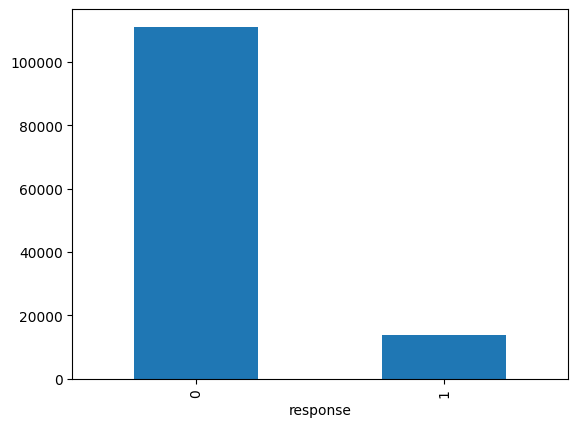

In [28]:
churn_counts=df['response'].value_counts()
churn_counts.plot(kind='bar')

In [29]:
top_5_cus=monetory.sort_values(ascending=False).head(5).index
top_customers_df=df[df['customer_id'].isin(top_5_cus)]

<Axes: xlabel='month_year'>

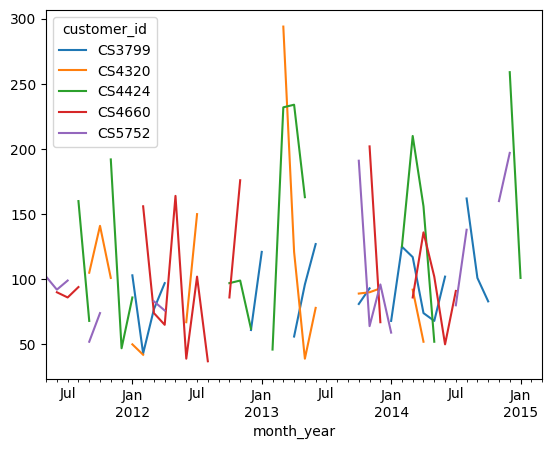

In [30]:
top_customer_sales=top_customers_df.groupby(['customer_id','month_year'])['tran_amount'].sum().unstack(level=0)
top_customer_sales.plot(kind='line')


In [31]:
df.to_csv('Main_Data.csv')
rfm.to_csv('ADV_Analysis.csv')

In [32]:
df.reset_index()

,index,customer_id,trans_date,tran_amount,response,month,month_year
0,0,CS5295,2013-02-11,35,1,2,2013-02
1,1,CS4768,2015-03-15,39,1,3,2015-03
2,2,CS2122,2013-02-26,52,0,2,2013-02
3,3,CS1217,2011-11-16,99,0,11,2011-11
4,4,CS1850,2013-11-20,78,0,11,2013-11
...,...,...,...,...,...,...,...
124964,124995,CS8433,2011-06-26,64,0,6,2011-06
124965,124996,CS7232,2014-08-19,38,0,8,2014-08
124966,124997,CS8731,2014-11-28,42,0,11,2014-11
124967,124998,CS8133,2013-12-14,13,0,12,2013-12


In [33]:
rfm.reset_index()

,customer_id,recency,frequency,monetory,Segment
0,CS1112,2015-01-14,15,1012,P0
1,CS1113,2015-02-09,20,1490,P0
2,CS1114,2015-02-12,19,1432,P0
3,CS1115,2015-03-05,22,1659,P0
4,CS1116,2014-08-25,13,857,P2
...,...,...,...,...,...
6879,CS8996,2014-12-09,13,582,P2
6880,CS8997,2014-06-28,14,543,P2
6881,CS8998,2014-12-22,13,624,P2
6882,CS8999,2014-07-02,12,383,P2
